IMPORT ALL PACKAGES TO BE USED

In [5]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [6]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # check current version
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go

4.14.1


In [7]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates

In [8]:
init_notebook_mode(connected=True)
cf.go_offline()

We need to get data using pandas datareader and Yahoo Finance API.<br> 
We will get stock information for following banks during 10-year period (2011-01-01 till 2021-05-01):<br>
<br>
Bank of America<br>
CitiGroup<br>
Goldman Sachs<br>
JPMorgan Chase<br>
Morgan Stanley<br>
Wells Fargo<br>

In [9]:
# Bank of America:
start = datetime(2011,1,1)
end = datetime (2021,5,1)
BAC = web.DataReader('BAC', 'yahoo', start, end)

In [10]:
BAC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-26,39.849998,39.279999,39.349998,39.410000,34699800.0,39.410000
2021-04-27,39.919998,39.509998,39.669998,39.880001,34304800.0,39.880001
2021-04-28,40.220001,39.880001,39.930000,40.029999,34084400.0,40.029999
2021-04-29,41.130001,40.459999,40.549999,41.110001,44008700.0,41.110001
2021-04-30,40.900002,40.470001,40.840000,40.529999,39191200.0,40.529999


In [11]:
# Do similar code for other banks:
# City Group:
start = datetime(2011,1,1)
end = datetime (2021,5,1)
CG = web.DataReader('C', 'yahoo', start, end)

# Goldman Sachs:
GS = web.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase:
JPM = web.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley:
MS = web.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = web.DataReader("WFC", 'yahoo', start, end)

In [12]:
WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,31.030001,30.660000,30.719999,30.990000,12108400.0,22.980227
2011-01-03,31.660000,31.160000,31.299999,31.580000,34397100.0,23.417738
2011-01-04,31.940001,31.490000,31.650000,31.650000,30341100.0,23.469646
2011-01-05,32.500000,31.400000,31.410000,32.369999,43245600.0,24.003551
2011-01-06,32.470001,32.119999,32.150002,32.150002,32500000.0,23.840412


In [13]:
# combine 6 dataframes we have just created into 1 for further analysis:
tickers = ['BAC', 'CG', 'GS', 'JPM', 'MS', 'WFC' ]
bank_stocks = pd.concat([BAC, CG, GS, JPM, MS, WFC], axis=1, keys=tickers )

In [14]:
bank_stocks.columns.names = ['Tickers', 'Stock Info']

In [15]:
bank_stocks.head()

Tickers       BAC                                                      CG  \
Stock Info   High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                        
2010-12-31  13.38  13.22  13.23  13.34   63036100.0  11.651569  47.599998   
2011-01-03  14.23  13.80  13.85  14.19  354322300.0  12.393984  49.000000   
2011-01-04  14.25  14.02  14.23  14.24  218978200.0  12.437654  49.400002   
2011-01-05  14.60  14.15  14.19  14.50  246151200.0  12.664748  50.000000   
2011-01-06  14.69  14.34  14.54  14.44  241658500.0  12.612343  50.500000   

Tickers                                      ...         MS             \
Stock Info        Low       Open      Close  ...       Open      Close   
Date                                         ...                         
2010-12-31  47.200001  47.500000  47.299999  ...  27.219999  27.209999   
2011-01-03  47.799999  47.799999  49.000000  ...  27.629999  28.230000   
2011-01-04  48.299999  49.099998  49.000000  ...  28.459999  28.469999   
2011-01-05  48.799999  48.799999  49.700001  ...  28.360001  28.830000   
2011-01-06  49.299999  50.000000  49.500000  ...  28.850000  28.799999   

Tickers                                  WFC                                   \
Stock Info      Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2010-12-31   6643200.0  22.531651  31.030001  30.660000  30.719999  30.990000   
2011-01-03  21176700.0  23.376272  31.660000  31.160000  31.299999  31.580000   
2011-01-04  12859900.0  23.575008  31.940001  31.490000  31.650000  31.650000   
2011-01-05  15101100.0  23.873106  32.500000  31.400000  31.410000  32.369999   
2011-01-06  13200900.0  23.848267  32.470001  32.119999  32.150002  32.150002   

Tickers                            
Stock Info      Volume  Adj Close  
Date                               
2010-12-31  12108400.0  22.980227  
2011-01-03  34397100.0  23.417738  
2011-01-04  30341100.0  23.469646  
2011-01-05  43245600.0  24.003551  
2011-01-06  32500000.0  23.840412  

[5 rows x 36 columns]

In [16]:
# Maximum close price of each bank during whole period
max_close_value = bank_stocks.xs('Close', axis=1, level='Stock Info').max()

In [17]:
max_close_value

Tickers
BAC     41.110001
CG      81.910004
GS     352.970001
JPM    157.649994
MS      84.339996
WFC     65.930000
dtype: float64

In [18]:
# the date to reach that max close price of each bank during whole period
bank_stocks['2021-01-15':'2021-05-01'].xs('Close', axis=1, level='Stock Info').idxmax()

# => from the result we can see that 4 out of 6 banks just reached new high price recently (Mar and Apr 2021),
# CG and WFC are left behind in terms of stock price in recent years

Tickers
BAC   2021-04-29
CG    2021-03-12
GS    2021-04-29
JPM   2021-03-18
MS    2021-03-12
WFC   2021-04-29
dtype: datetime64[ns]

In [19]:
### another way:
for tick in tickers:
    x = bank_stocks[tick][bank_stocks[tick]['Close']==max_close_value[tick]]
    print(tick, "  ", x['Close'])

BAC    Date
2021-04-29    41.110001
Name: Close, dtype: float64
CG    Date
2020-01-14    81.910004
Name: Close, dtype: float64
GS    Date
2021-04-29    352.970001
Name: Close, dtype: float64
JPM    Date
2021-03-18    157.649994
Name: Close, dtype: float64
MS    Date
2021-03-12    84.339996
Name: Close, dtype: float64
WFC    Date
2018-01-26    65.93
Name: Close, dtype: float64


INVESTIGATE MORE TO SEE WHAT HAPPENED TO THESE BANKS IN 2020-2021

In [20]:
# create dataframe of Close price for each bank: 

close_price = bank_stocks.xs('Close', level='Stock Info', axis=1)
close_price.head()

Tickers,BAC,CG,GS,JPM,MS,WFC
Date,,,,,,
2010-12-31,13.34,47.299999,168.160004,42.419998,27.209999,30.990000
2011-01-03,14.19,49.000000,173.050003,43.580002,28.230000,31.580000
2011-01-04,14.24,49.000000,173.080002,44.160000,28.469999,31.650000
2011-01-05,14.50,49.700001,174.000000,44.700001,28.830000,32.369999
2011-01-06,14.44,49.500000,172.210007,44.480000,28.799999,32.150002


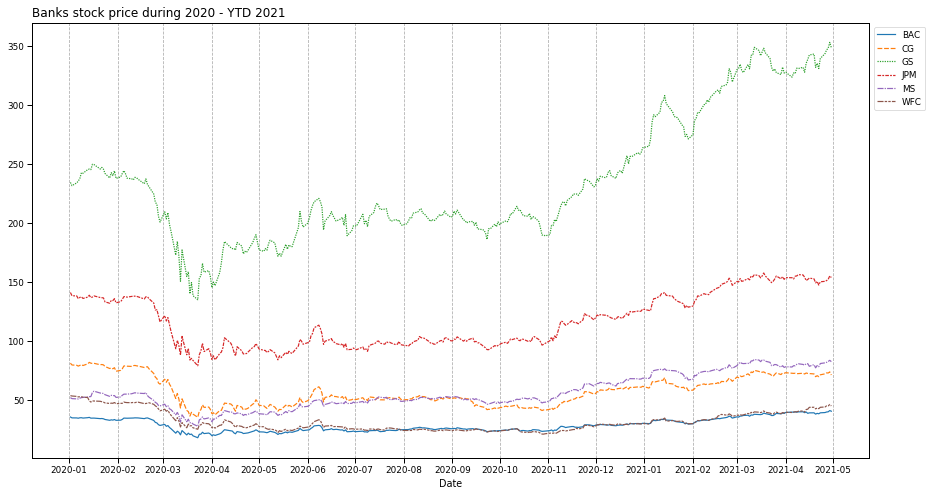

In [21]:
# plotting close_price dataframe and choose period we want to analyze more:
fig = plt.figure(figsize=(15,8))
sns.set_context("paper", font_scale=1)
sns.lineplot(data=close_price['2020-01-01':'2021-05-01']) 
plt.title('Banks stock price during 2020 - YTD 2021', fontsize=12, loc='left')
plt.legend(bbox_to_anchor=(1,1))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.grid(axis = 'x', linestyle='--')

# from below chart, we can see that all banks have downtrend in Mar20 due to Covid's situation getting worse in the US, 
# but all banks have bounced back since then, 4 out of 6 banks reaching new high in Mar and Apr-21

# If we look a bit closer, we can see that all banks have sudden drop in late Jan-21 (29 Jan), maybe caused by 2 below reasons:
# 1. U.S. confirms 1st cases of South Africa coronavirus variant
# 2. GameStop shares continued to drop by 44 percent after a days-long meteoric rise

In [22]:
# we can also use plotly to have an interactive chart: 
close_price.reset_index().iplot(kind='scatter',x='Date',mode='lines',size=1,
                                title='Banks stock price during 2020 - YTD 2021',
                                theme='solar', xrange=['2020-01-01','2021-01-01'])

In [23]:
close_price.loc['2020-01-02':'2020-12-31']

Tickers,BAC,CG,GS,JPM,MS,WFC
Date,,,,,,
2020-01-02,35.639999,81.230003,234.320007,141.089996,52.040001,53.750000
2020-01-03,34.900002,79.699997,231.580002,138.339996,51.200001,53.419998
2020-01-06,34.849998,79.449997,233.949997,138.229996,51.020000,53.099998
2020-01-07,34.619999,78.760002,235.490005,135.880005,50.919998,52.660000
2020-01-08,34.970001,79.360001,237.759995,136.940002,51.570000,52.820000
...,...,...,...,...,...,...
2020-12-24,29.959999,60.570000,256.160004,124.519997,68.089996,29.840000
2020-12-28,30.129999,61.130001,259.589996,125.339996,68.050003,29.930000
2020-12-29,30.010000,60.910000,258.010010,125.010002,67.709999,29.780001


In [24]:
# change of close price between end of 2020 and beginning of 2020:

close_price.loc['2020-12-31'] / close_price.loc['2020-01-02'] - 1

# consider an investment at the beginning of 2020, you will earn most if buying Morgan Stanley stocks, with return around 32%.
# on the opposite, if u invested in Wells Fargo, your investment could have dropped down nearly half of it (~44%) 

Tickers
BAC   -0.149551
CG    -0.240921
GS     0.125427
JPM   -0.099369
MS     0.316872
WFC   -0.438512
dtype: float64

Calculate price's change for each bank at Close price each day:

In [25]:
# create empty dataframe:
return_per = pd.DataFrame()
type(return_per)

pandas.core.frame.DataFrame

In [26]:
bank_stocks['BAC']['Close'].pct_change()

Date
2010-12-31         NaN
2011-01-03    0.063718
2011-01-04    0.003524
2011-01-05    0.018258
2011-01-06   -0.004138
                ...   
2021-04-26    0.005870
2021-04-27    0.011926
2021-04-28    0.003761
2021-04-29    0.026980
2021-04-30   -0.014109
Name: Close, Length: 2600, dtype: float64

In [27]:
# calculate percentage change for each bank and add new column to the dataframe created above:
for tick in tickers:
    return_per[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [28]:
return_per['2020-03-01':'2020-04-01']

,BAC Return,CG Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2020-03-02,0.030526,0.065080,0.043333,0.046594,0.032201,0.034517
2020-03-03,-0.055158,-0.037579,-0.028835,-0.037525,-0.044750,-0.040937
2020-03-04,0.023063,0.035972,0.026102,0.024709,0.018919,0.021466
2020-03-05,-0.056710,-0.057872,-0.047667,-0.049061,-0.058577,-0.060386
2020-03-06,-0.039955,-0.034809,-0.029881,-0.051680,-0.017610,-0.046530
2020-03-09,-0.147024,-0.161717,-0.103915,-0.135455,-0.103728,-0.124292
2020-03-10,0.076607,0.081955,0.066779,0.077697,0.053333,0.080049
2020-03-11,-0.039814,-0.086182,-0.067589,-0.047070,-0.066582,-0.078392
2020-03-12,-0.095280,-0.148258,-0.123393,-0.082430,-0.150800,-0.158676


In [ ]:
sns.pairplot(return_per)

In [ ]:
return_per.max() # during more than 10-year period, the highest percentage change in a single day can be up to ~20% for a bank

In [ ]:
return_per.idxmax() # all of 6 banks have highest price change in Mar20, indicating how bad Covid has hit the US

In [ ]:
return_per.std()

In [ ]:
return_per['2020-01-01':'2021-01-01'].std() # 2020-2021 has higher standard deviation than other years

In [ ]:
# create another column consider average change of all banks:
return_per['Avg Change'] = return_per.mean(axis=1)
return_per

In [ ]:
# plotting the average change of all banks to see fluctuated it is each day:
fig = plt.figure(figsize=(20,8))
sns.set_context("paper", font_scale=1)
sns.lineplot(data=(return_per['2020-01-01':'2021-05-01']['Avg Change']*100)) 
plt.title('Price Variance during 2020 - YTD 2021', fontsize=12, loc='left')
plt.legend(bbox_to_anchor=(1,1))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.grid(axis = 'x', linestyle='--')

## we see that the price has high fluctuation in Mar20 and an unusual rise in Nov20, let's try to find
## what has happened in those periods

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.set_context("paper", font_scale=1)
sns.lineplot(data=(return_per['2020-03-01':'2020-04-01']['Avg Change']*100)) 
plt.title('Price Variance in Mar20', fontsize=12, loc='left')
plt.grid(axis = 'x', linestyle='--')

pd.options.display.float_format = '{:,.2f}'.format
return_per['2020-03-01':'2020-04-01']

# so we all know Mar20 was when Covid situation in the US started to get more serious, that's why the price change in this month
# was mostly negative with high variance. However, due to support of government aid bill, the market has got highest uplift
# since 1933 on 24th of March, which we can also see our figures related in below table

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.set_context("paper", font_scale=1)
sns.lineplot(data=(return_per['2020-11-01':'2020-12-01']['Avg Change']*100)) 
plt.title('Price Variance in Nov20', fontsize=12, loc='left')
plt.grid(axis = 'x', linestyle='--')

pd.options.display.float_format = '{:,.2f}'.format
return_per['2020-11-01':'2020-12-01']

# another surge also happened on Nov 9, when Pfizer announced their late-stage trials of Corona vaccince and their plan to
# distribute that to the people in need at the end of 2020, which has brought hopes to everyone and the stock market

THANK YOU FOR READING! ^^